Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (128, 64, 32, 16), 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'lbfgs'}


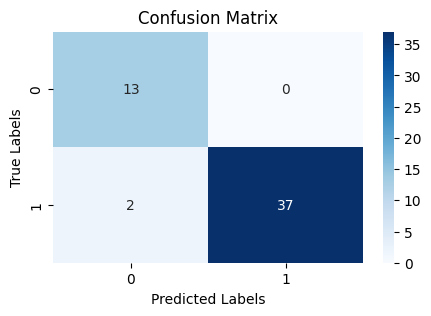


Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.95      0.97        39

    accuracy                           0.96        52
   macro avg       0.93      0.97      0.95        52
weighted avg       0.97      0.96      0.96        52


Accuracy: 0.9615384615384616


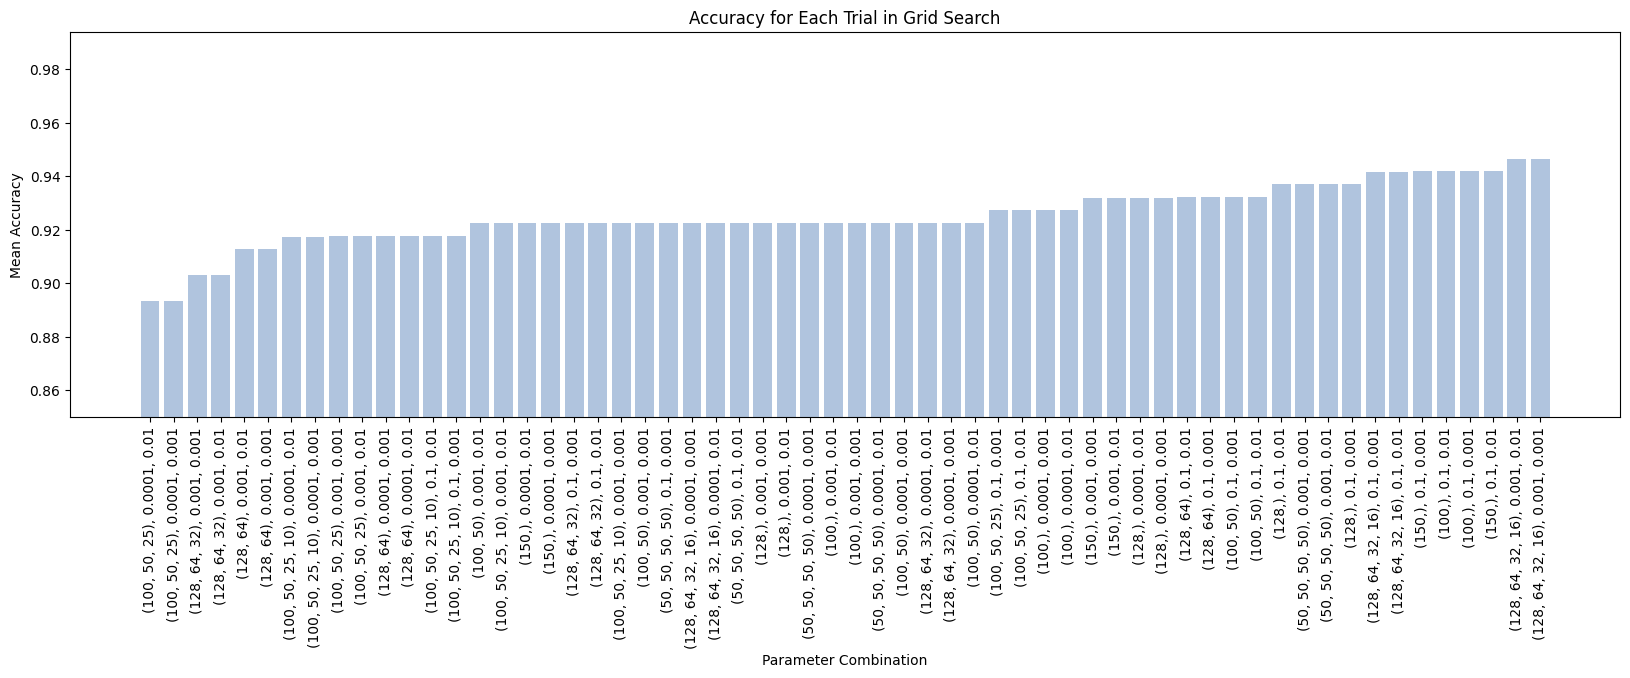

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = 'out_csv/decay_input_features.csv'
df = pd.read_csv(file_path)

# Drop Nans
df.dropna(inplace=True)

X = df.drop(columns=['Target Label'])  # Features
y = df['Target Label']  # Target

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'hidden_layer_sizes': [
        (50, 50, 50, 50),
        (100,), (128,), (150,),
        (100, 50), (128, 64),
        (100, 50, 25), (128, 64, 32),
        (100, 50, 25, 10), (128, 64, 32, 16)
    ], 
    'activation': ['relu'], 
    'solver': ['lbfgs'], 
    'alpha': [0.0001, 0.001, 0.1],  # Regularization
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500]
}

mlp = MLPClassifier(random_state=42, verbose=True)
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_model.predict(X_test_scaled)

# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


# Plot accuracy for each trial in the grid search
results = pd.DataFrame(grid_search.cv_results_)
results_sorted = results.sort_values(by='mean_test_score')

params_labels_sorted = []
for params in results_sorted['params']:
    label = f'{params["hidden_layer_sizes"]}, {params["alpha"]}, {params["learning_rate_init"]}'
    params_labels_sorted.append(label)

plt.figure(figsize=(20, 5))
plt.bar(np.arange(len(results_sorted)), results_sorted['mean_test_score'], color='lightsteelblue')
plt.xlabel('Parameter Combination')
plt.ylabel('Mean Accuracy')
plt.ylim(0.85)
plt.title('Accuracy for Each Trial in Grid Search')
plt.xticks(np.arange(len(results_sorted)), labels=params_labels_sorted, rotation=90)
plt.show()

